# Set working directory

In [2]:
import os
cwd = os.path.split(os.getcwd())
if cwd[-1] == 'tutorials':
    os.chdir('..')
    print(f'Changed directory to {os.getcwd()}')
!python --version

Python 3.7.4


# Import modules

In [3]:
from utils.bron_network_utils import load_graph_nodes
from meta_analysis.make_data_summary import load_graph_network, main_data_summary
from meta_analysis.meta_analysis_scripts.vendor_threat_data_types import threat_info_bar_graph
from meta_analysis.meta_analysis_scripts.data_types_over_versions import data_types_over_versions
from meta_analysis.meta_analysis_scripts.cve_connectivity_by_year import cve_connectivity_by_year
from meta_analysis.meta_analysis_scripts.make_edge_distributions import tactic_edge_hist, technique_edge_hist, capec_edge_hist, cwe_edge_hist, cve_cpe_edge_hist
from meta_analysis.meta_analysis_scripts.vendor_applications import make_vendor_to_cpes, make_vendor_to_num_cpes, vendor_num_apps_histogram
from meta_analysis.meta_analysis_scripts.cve_data_helper import line_plot_cvss_scores_by_year, density_plot_cvss_scores
from meta_analysis.meta_analysis_scripts.vendor_tactic_and_cvss import bron_id_to_cpe_id, cve_to_risk, make_heat_map, max_cve_risk_violin, max_cve_risk_violin_tactic

# Meta-analysis

There are several meta-analysis files that can be run on BRON_db and network-specific BRON_db. Make sure to first build the BRON_db before running the meta-analysis. A tutorial on how to build BRON is available in the tutorials folder.

# Make data summary

BRON_db can be used to make CSV files that contain data summaries of the threat data. For each type of threat data, the data summary includes how many and which edges are connected to both the next threat data layer and the previous layer. Additionally, for CVEs, the vendors of CPE that the CVE is connected to and the number of unique CPE products that the CVE is connected to are included. The CPE summary includes the vendor, product and version of each CPE. To make data summaries, run the following command:
```
python -m meta_analysis.make_data_summary --db_path DB_PATH --save_folder SAVE_PATH 
```
Optional arguments:
```
--tactic --technique --cwe --cve --capec --cpe --not_all_cpe_versions
```
`DB_PATH` is the file path of BRON_db, and `SAVE_PATH` is the folder path to save the data summaries. For each threat data type to make a data summary of, add the name of the threat data type as an argument. To make a data summary using only the latest version of Affected Platform Configurations, add the argument `--not_all_cpe_versions`.

In [4]:
db_path = 'data/BRON_db.json'
save_folder = 'data/all_cves_all_versions'
tactic = technique = capec = cwe = cve = cpe = True
not_all_cpe_versions = False
graph = load_graph_network(db_path, not_all_cpe_versions)
datatypes = []
if capec:
    datatypes.append("capec")
if cwe:
    datatypes.append("cwe")
if cve:
    datatypes.append("cve")
if cpe:
    datatypes.append("cpe")
if tactic:
    datatypes.append("tactic")
if technique:
    datatypes.append("technique")
main_data_summary(graph, save_folder, datatypes)

capec
cwe
cve
cpe
tactic
technique


# Number of data types for specific vendors

For a specific vendor, BRON_db can be used to find the number of data types (Tactics, Techniques, Attack Patterns, Weaknesses, Vulnerabilities, and Affected Platform Configurations) associated with that vendor. To plot the number of each data type for specific vendors, run the following command:
```
python meta_analysis/meta_analysis_scripts/vendor_threat_data_types.py --vendors VENDORS --search_result_folder_path SEARCH_RESULT_FOLDER_PATH --save_path SAVE_PATH
```
`VENDORS` is a comma-delimited string of vendor names, `SEARCH_RESULT_FOLDER_PATH` is the folder path to path search results for each vendor, and `SAVE_PATH` is the file path to save the figure. The path search results for given vendors (e.g. IBM) should be named as `search_result_ibm.csv`.

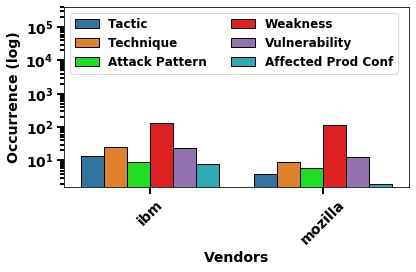

In [5]:
vendors = 'ibm,mozilla'
search_result_folder_path = 'example_data'
save_path = 'data/figures/ibm_mozilla_data_types.png'
vendors_split = vendors.split(',')
threat_info_bar_graph(vendors_split, search_result_folder_path, save_path=save_path)

# Number of data types for specific vendor products

Similar to finding the number of data types for specific vendors, BRON_db can also find the number of data types for specific vendor products. To plot the number of data types for specific vendor products over all product versions, run the following command:
```
python meta_analysis/meta_analysis_scripts/data_types_over_versions.py --db_path DB_PATH --vendor VENDOR --product PRODUCT --starting_point_file STARTING_POINT_FILE --search_result_file SEARCH_RESULT_FILE --save_path SAVE_PATH
```
`DB_PATH` is the file path to BRON_db, `VENDOR` is the selected vendor, `PRODUCT` is the selected product of the given vendor, `STARTING_POINT_FILE` is the file path to an empty CSV file to save path search starting points, `SEARCH_RESULT_FILE` is the path to an empty CSV file to save path search results, and `SAVE_PATH` is the file path to save the new figure.

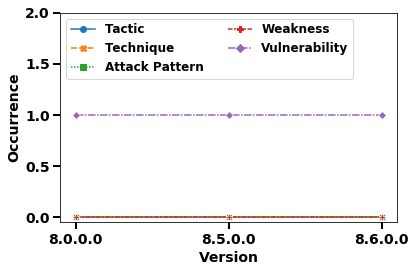

In [6]:
db_path = 'data/BRON_db.json'
vendor = 'ibm'
product = 'business_process_manager'
starting_point_file = 'example_data/starting_point_ibm_business_process_manager.csv'
search_result_file = 'data/search_result_ibm_business_process_manager.csv'
save_path = 'data/figures/ibm_business_process_manager.png'
data_types_over_versions(db_path, vendor, product, starting_point_file, search_result_file, save_path=save_path)

# Paths to Vulnerabilities

Because the different data types are linked together via a graph in BRON_db, Vulnerabilities can be reached by paths from other data types. The number and percentage of Vulnerabilities connected to a Tactic, Attack Pattern, or Weakness can be drawn over specific years. To plot the number or percentage of different Vulnerability paths over years, run the following command:
```
python meta_analysis/meta_analysis_scripts/cve_connectivity_by_year.py --years YEARS --search_result_folder_path SEARCH_RESULT_FOLDER_PATH --number_or_percent NUMBER_OR_PERCENT --save_path SAVE_PATH
```
`YEARS` is a comma-delimited string of years, `SEARCH_RESULT_FOLDER_PATH` is the folder path to path search results for each year, `NUMBER_OR_PERCENT` is either "number" or "percent" to determine plot type, and `SAVE_PATH` is the file path to save the figure. The path search results for given years (e.g. 2018) should be named as `search_result_cve_2018.csv`.

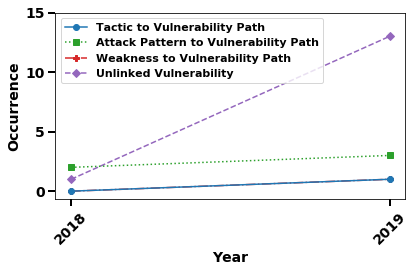

In [7]:
years = '2018,2019'
search_result_folder_path = 'example_data'
number_or_percent = 'number'
save_path = 'data/figures/2018_2019_cve_paths.png'
years_split = years.split(',')
cve_connectivity_by_year(years_split, search_result_folder_path, number_or_percent, save_path=save_path)

# Number of edges for data types

The data type nodes in BRON_db are linked to other data types with edges. The number of edges for Tactics, Techniques, Attack Patterns, Weaknesses, Vulnerabilities, and Affected Platform Configurations can be found. To plot the number of edges for a specific data type, run the following command:
```
python meta_analysis/meta_analysis_scripts/make_edge_distributions.py --data_summary_folder_path DATA_SUMMARY_FOLDER_PATH --data_type DATA_TYPE --save_path SAVE_PATH
```
`DATA_SUMMARY_FOLDER_PATH` is the folder path containing subfolders of the data summaries, `DATA_TYPE` is the selected data type (either "tactic", "technique", "capec", "cwe", "cve", or "cpe"), and `SAVE_PATH` is the file path to save the figure.

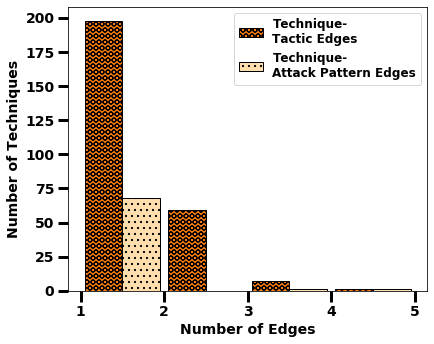

In [8]:
data_summary_folder_path = 'data'
data_type = 'technique'
save_path = 'data/figures/technique_edges.png'
technique_edge_hist(data_summary_folder_path, save_path=save_path)

# Number of Affected Product Configurations across vendors

To plot the number of Affected Platform Configurations for different vendors, run the following command:
```
python meta_analysis/meta_analysis_scripts/vendor_applications.py --cpe_summary_all_versions_path CPE_SUMMARY_ALL_VERSIONS_PATH --cpe_summary_latest_version_path CPE_SUMMARY_LATEST_VERSION_PATH --save_path SAVE_PATH
```
`CPE_SUMMARY_ALL_VERSIONS_PATH` is the file path to "cpe_summary.csv" when all versions of Affected Platform Configurations are used, `CPE_SUMMARY_LATEST_VERSION_PATH` is the file path to "cpe_summary.csv" when only the latest version of Affected Platform Configurations are used, and `SAVE_PATH` is the file path to save the figure.

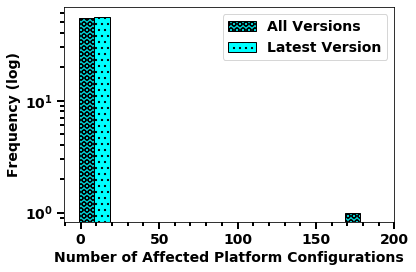

In [9]:
cpe_summary_all_versions = 'data/all_cves_all_versions/cpe_summary.csv'
cpe_summary_latest_version = 'data/all_cves_latest_version/cpe_summary.csv'
save_path = 'data/figures/vendor_applications.png'
vendor_to_cpes = make_vendor_to_cpes(cpe_summary_all_versions)
vendor_to_num_cpes = make_vendor_to_num_cpes(vendor_to_cpes)
num_cpes = list(vendor_to_num_cpes.values())
vendor_to_cpes_versioning = make_vendor_to_cpes(cpe_summary_latest_version)
vendor_to_num_cpes_versioning = make_vendor_to_num_cpes(vendor_to_cpes_versioning)
num_cpes_versioning = list(vendor_to_num_cpes_versioning.values())
vendor_num_apps_histogram(num_cpes, num_cpes_versioning, save_path=save_path)

# CVSS scores by year

To plot a line plot of CVSS scores by year or a density plot of CVSS scores, run the following command:
```
python meta_analysis/meta_analysis_scripts/cve_data_helper.py --years YEARS --data_summary_folder_path DATA_SUMMARY_FOLDER_PATH --plot_type PLOT_TYPE --save_path SAVE_PATH
```
`YEARS` is a comma-delimited string of years, `DATA_SUMMARY_FOLDER_PATH` is the folder path to subfolders of data summaries, `PLOT_TYPE` is either a 'line-plot' of CVSS scores by year or a 'density-plot' of CVSS scores, and `SAVE_PATH` is the file path to save the figure.

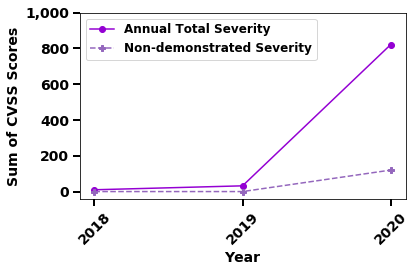

In [10]:
years = '2018,2019,2020'
data_summary_folder_path = 'data'
plot_type = 'line-plot'
save_path = 'data/figures/cvss_scores_by_year.png'
years_split = years.split(',')
line_plot_cvss_scores_by_year(data_summary_folder_path, years_split, save_path=save_path)

# Tactics and CVSS scores for specific vendors

BRON_db can be used to plot a heatmap or violinplot of different tactics and vendors. The heatmap shows the number of unique products of each vendor affected by each tactic. The violinplot can show the CVSS scores of products of each vendor affected by either all tactics or two specific tactics for comparison. To plot the heatmap or violinplot, run the following command:
```
python meta_analysis/meta_analysis_scripts/vendor_tactic_and_cvss.py --tactics TACTICS --vendors VENDORS --tactic_search_result_file TACTIC_SEARCH_RESULT_FILE --vendor_search_result_folder VENDOR_SEARCH_RESULT_FOLDER --plot_type PLOT_TYPE --cve_summary_path CVE_SUMMARY_PATH --save_path SAVE_PATH --violin_stick (optional)
```
`TACTICS` is a comma-delimited string of tactic names, `VENDORS` is a comma-delimited string of vendor names, `TACTIC_SEARCH_RESULT_FILE` is the file path containing path search results for the selected tactics, `VENDOR_SEARCH_RESULT_FOLDER` is the folder path containing path search results for the selected vendors, `PLOT_TYPE` is either "heatmap", "violinplot", or "two-tactic-violinplot", `CVE_SUMMARY_PATH` is the file path to "cve_summary.csv" when all Vulnerabilities and all versions of Affected Platform Configurations are used, and `SAVE_PATH` is the file path to save the figure. To add sticks to the violinplots, use the argument `--violin_stick`.

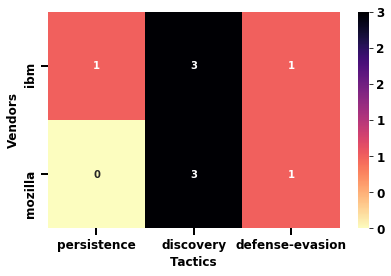

In [11]:
tactics = 'persistence,discovery,defense-evasion'
vendors = 'ibm,mozilla'
tactic_search_result_file = 'data/search_result_tactic.csv'
vendor_search_result_folder = 'example_data'
plot_type = 'heatmap'
cve_summary_path = 'data/all_cves_all_versions/cve_summary.csv'
save_path = 'data/figures/vendor_tactics.png'
violin_stick = False
tactics_split = tactics.split(',')
vendors_split = vendors.split(',')
bron_id_to_cpe_id_dict = bron_id_to_cpe_id()
cve_to_risk_dict = cve_to_risk(cve_summary_path)
all_tactics_name_to_id = {"persistence": "tactic_00008", "privilege-escalation": "tactic_00021",
                          "discovery": "tactic_00014", "initial-access": "tactic_00089",
                          "lateral-movement": "tactic_00026", "execution": "tactic_00038",
                          "credential-access": "tactic_00006", "defense-evasion": "tactic_00012",
                          "impact": "tactic_00240", "command-and-control": "tactic_00002",
                          "exfiltration": "tactic_00004", "collection": "tactic_00010"}
tactic_ids = []
for tactic in tactics_split:
    tactic_ids.append(all_tactics_name_to_id[tactic])
make_heat_map(tactics_split, vendors_split, tactic_ids, tactic_search_result_file, bron_id_to_cpe_id_dict, save_path=save_path)